In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [242]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
test_ids = test['Id'].values

In [243]:
print('train:', train.shape)
print('test: ', test.shape)

train: (1460, 81)
test:  (1459, 80)


In [244]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

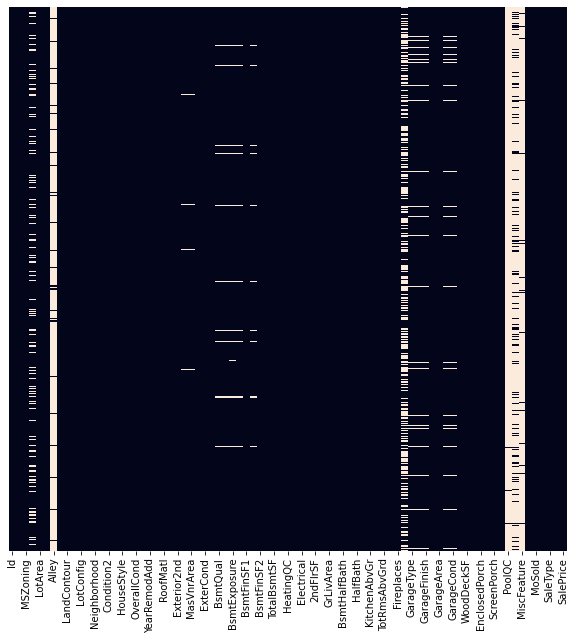

In [245]:
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

<AxesSubplot:>

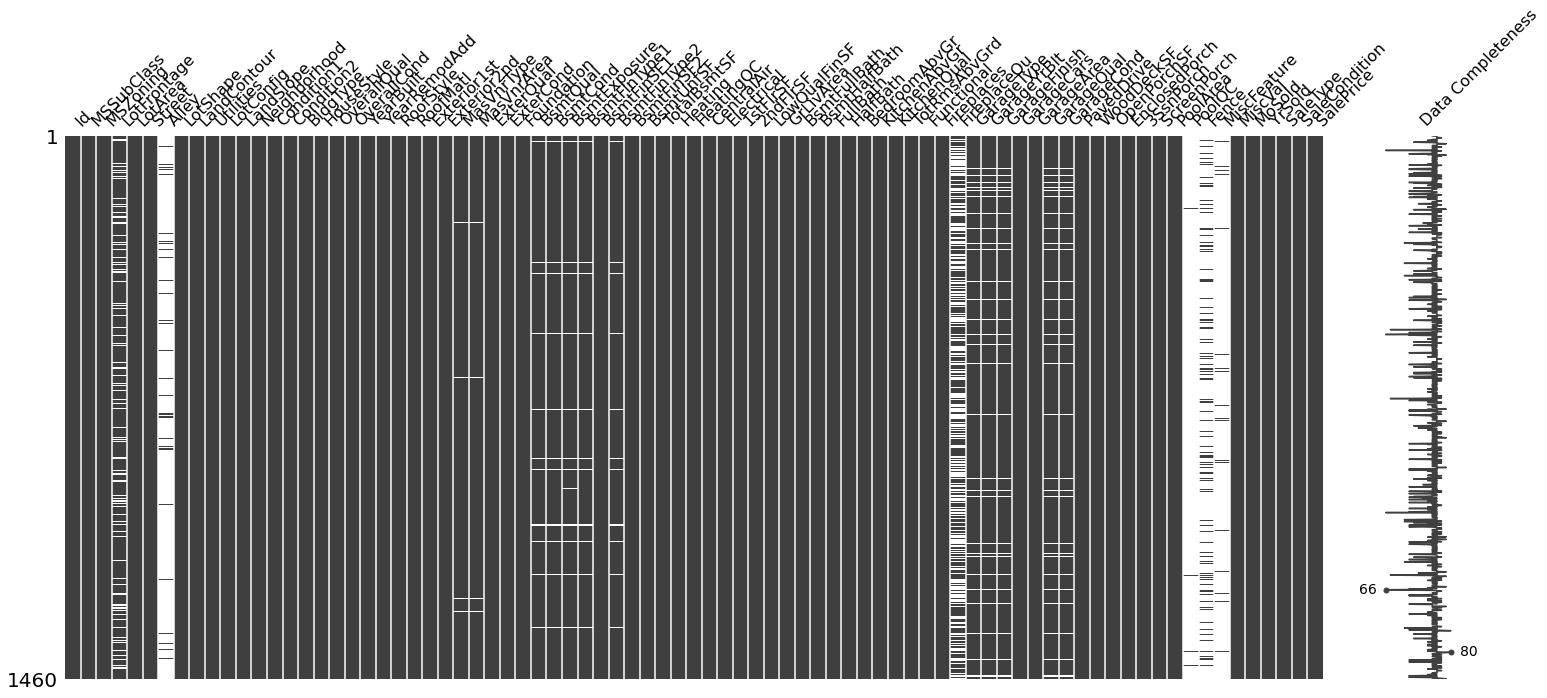

In [246]:
import missingno as msno
msno.matrix(train, labels=True)

In [247]:
perc_list=[]
type_list=[]
na_df = pd.DataFrame(data=(train.isna().sum()[train.isna().sum()>0]),columns=['NA_sums']).reset_index()

for i in na_df['NA_sums'].values:
    perc_list.append(f"{i/len(train):.2%}")

for type in na_df['index'].values:
    type_list.append(train[type].dtype)

na_df['percentage']=perc_list
na_df['types']=type_list
na_df


index  NA_sums percentage    types
0    LotFrontage      259     17.74%  float64
1          Alley     1369     93.77%   object
2     MasVnrType        8      0.55%   object
3     MasVnrArea        8      0.55%  float64
4       BsmtQual       37      2.53%   object
5       BsmtCond       37      2.53%   object
6   BsmtExposure       38      2.60%   object
7   BsmtFinType1       37      2.53%   object
8   BsmtFinType2       38      2.60%   object
9     Electrical        1      0.07%   object
10   FireplaceQu      690     47.26%   object
11    GarageType       81      5.55%   object
12   GarageYrBlt       81      5.55%  float64
13  GarageFinish       81      5.55%   object
14    GarageQual       81      5.55%   object
15    GarageCond       81      5.55%   object
16        PoolQC     1453     99.52%   object
17         Fence     1179     80.75%   object
18   MiscFeature     1406     96.30%   object

In [248]:
def clean(train):
    train.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)
    train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
    train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
    train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
    train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
    train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
    train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
    train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
    train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
    train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])
    train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
    train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
    train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
    train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
    train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
    train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
    
    train['MSZoning']=train['MSZoning'].fillna(train['MSZoning'].mode()[0])
    

    return train

train=clean(train)
test=clean(test)

    

In [249]:
train.isna().sum()[train.isna().sum()>0]

Series([], dtype: int64)

In [251]:
nan_cols = test.isnull().sum()[test.isnull().sum()>0]
nan_cols = nan_cols.index
nan_cols

Index(['Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType'],
      dtype='object')

In [253]:
for row in nan_cols:
    test[row]=test[row].fillna(test[row].mode()[0])
    

In [254]:
print('NA Values:\n',train.isnull().sum()[train.isnull().sum()>0])
print('NA Values:\n',test.isnull().sum()[test.isnull().sum()>0])

NA Values:
 Series([], dtype: int64)
NA Values:
 Series([], dtype: int64)


<AxesSubplot:>

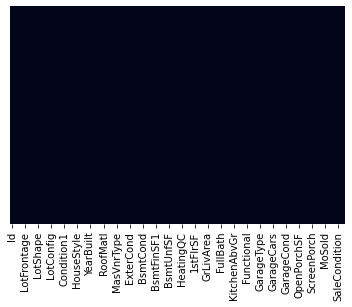

In [255]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [257]:
columns = train.select_dtypes(include='object').columns.values
columns = list(columns)
columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [258]:
train_one_hot = train.copy()
test_one_hot = test.copy()

In [259]:
for column in columns:
    train_one_hot = pd.get_dummies(data=train_one_hot, columns=[column], prefix=[column])
    test_one_hot = pd.get_dummies(data=test_one_hot, columns=[column], prefix=[column])

In [260]:
print('train:', train_one_hot.shape)
print('test: ', test_one_hot.shape)

train: (1460, 277)
test:  (1459, 260)


In [262]:
diff_cols = train_one_hot.columns[~train_one_hot.columns.isin(test_one_hot.columns)].values
diff_cols

array(['SalePrice', 'Utilities_NoSeWa', 'Condition2_RRAe',
       'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin',
       'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW',
       'Electrical_Mix', 'GarageQual_Ex'], dtype=object)

In [263]:
for col in diff_cols:
    test_one_hot[col] = 0

In [265]:
test_one_hot.drop(columns=['SalePrice'], axis=1, inplace=True)

In [266]:
print('train:', train_one_hot.shape)
print('test: ', test_one_hot.shape)

train: (1460, 277)
test:  (1459, 276)


In [267]:
X_train = train_one_hot.drop(['SalePrice'], axis=1)
y_train = train_one_hot['SalePrice']

In [268]:
import xgboost as xgb
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [269]:
y_pred = model.predict(test_one_hot)

In [270]:
y_pred

array([125449.25 , 152447.73 , 183219.83 , ..., 178892.9  , 113265.336,
       226430.3  ], dtype=float32)

In [292]:
xgb_grid = { 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6,10],
     'booster': ['gbtree','gblinear'],
     'learning_rate': [0.1, 0.01, 0.5],
     'min_child_weight': [1,2,3,4]
}

In [293]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100 
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100 
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100 
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100 
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100 
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100 
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100 
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100 


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, total=   0.9s
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, total=   1.0s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100 
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, total=   1.0s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, total=   1.0s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, total=   1.0s
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, total=   1.1s


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.1s


[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, total=   4.6s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, total=   5.0s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, total=   4.6s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, total=   4.8s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000, total=   9.1s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000 
[CV]  boo

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min


[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=500, total=   5.2s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=1000 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=500, total=   5.3s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=1000 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=500, total=   5.3s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=1000 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=500, total=   5.6s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=1000 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=1000, total=  10.2s
[CV] booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=1000 
[CV]  boo

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.2min


[CV]  booster=gbtree, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=500, total=  11.9s
[CV] booster=gbtree, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1000 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1000, total=  23.6s
[CV] booster=gbtree, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1000 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1000, total=  23.8s
[CV] booster=gbtree, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1000 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1000, total=  23.6s
[CV] booster=gbtree, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1000, total=  23.3s
[CV] booster=gbtree, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=100 
[CV]  bo

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 10.1min


[CV]  booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, total=  24.1s
[CV] booster=gbtree, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, total=  24.2s
[CV] booster=gbtree, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, total=   2.9s
[CV] booster=gbtree, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100, total=   2.8s
[CV] booster=gbtree, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1000, total=  23.9s
[CV] booster=gbtree, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=100 
[CV]  booste

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 21.8min


[CV]  booster=gbtree, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=100, total=   0.9s
[CV] booster=gbtree, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=100, total=   1.0s
[CV] booster=gbtree, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=100, total=   1.0s
[CV] booster=gbtree, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=100, total=   1.0s
[CV] booster=gbtree, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=100 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=100, total=   1.0s
[CV] booster=gbtree, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=200 
[CV] 

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 28.1min


[CV]  booster=gbtree, learning_rate=0.01, max_depth=4, min_child_weight=4, n_estimators=1000, total=  19.1s
[CV] booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, total=   2.4s
[CV] booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, total=   2.4s
[CV] booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, total=   2.3s
[CV] booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, total=   2.4s
[CV] booster=gbtree, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200 
[CV]

[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 44.3min


[CV]  booster=gbtree, learning_rate=0.5, max_depth=2, min_child_weight=2, n_estimators=200, total=   2.4s
[CV] booster=gbtree, learning_rate=0.5, max_depth=2, min_child_weight=2, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.5, max_depth=2, min_child_weight=2, n_estimators=200, total=   2.5s
[CV] booster=gbtree, learning_rate=0.5, max_depth=2, min_child_weight=2, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.5, max_depth=2, min_child_weight=2, n_estimators=200, total=   2.4s
[CV] booster=gbtree, learning_rate=0.5, max_depth=2, min_child_weight=2, n_estimators=200 
[CV]  booster=gbtree, learning_rate=0.5, max_depth=2, min_child_weight=2, n_estimators=200, total=   2.4s
[CV] booster=gbtree, learning_rate=0.5, max_depth=2, min_child_weight=2, n_estimators=500 
[CV]  booster=gbtree, learning_rate=0.5, max_depth=2, min_child_weight=2, n_estimators=200, total=   2.6s
[CV] booster=gbtree, learning_rate=0.5, max_depth=2, min_child_weight=2, n_estimators=500 
[CV]  booster=g

[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 55.6min


[CV]  booster=gbtree, learning_rate=0.5, max_depth=6, min_child_weight=1, n_estimators=200, total=   6.8s
[CV] booster=gbtree, learning_rate=0.5, max_depth=6, min_child_weight=1, n_estimators=500 
[CV]  booster=gbtree, learning_rate=0.5, max_depth=6, min_child_weight=1, n_estimators=200, total=   6.7s
[CV] booster=gbtree, learning_rate=0.5, max_depth=6, min_child_weight=1, n_estimators=500 
[CV]  booster=gbtree, learning_rate=0.5, max_depth=5, min_child_weight=4, n_estimators=1000, total=  27.1s
[CV] booster=gbtree, learning_rate=0.5, max_depth=6, min_child_weight=1, n_estimators=500 
[CV]  booster=gbtree, learning_rate=0.5, max_depth=5, min_child_weight=4, n_estimators=1000, total=  27.2s
[CV] booster=gbtree, learning_rate=0.5, max_depth=6, min_child_weight=1, n_estimators=500 
[CV]  booster=gbtree, learning_rate=0.5, max_depth=6, min_child_weight=1, n_estimators=500, total=  15.7s
[CV] booster=gbtree, learning_rate=0.5, max_depth=6, min_child_weight=1, n_estimators=500 
[CV]  booster

[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 69.1min


[02:40:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]  booster=gblinear, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=500, total=   1.7s
[CV] booster=gblinear, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=1000 
[02:40:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly 

[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 71.5min


[CV]  booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, total=   0.3s
[CV] booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, total=   0.4s
[CV]  booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, total=   0.3s
[CV] booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100 
[CV]  booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, total=   0.4s
[CV] booster=gblinear, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100 
[02:42:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by langua

[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 74.1min


[CV]  booster=gblinear, learning_rate=0.5, max_depth=2, min_child_weight=3, n_estimators=100, total=   0.4s
[CV] booster=gblinear, learning_rate=0.5, max_depth=2, min_child_weight=3, n_estimators=200 
[CV]  booster=gblinear, learning_rate=0.5, max_depth=2, min_child_weight=3, n_estimators=100, total=   0.4s
[CV]  booster=gblinear, learning_rate=0.5, max_depth=2, min_child_weight=3, n_estimators=100, total=   0.4s
[CV] booster=gblinear, learning_rate=0.5, max_depth=2, min_child_weight=3, n_estimators=200 
[CV] booster=gblinear, learning_rate=0.5, max_depth=2, min_child_weight=3, n_estimators=200 
[02:45:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but ge

[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 76.9min finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [294]:
xgb_cv.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 2,
 'n_estimators': 1000}

In [295]:
xgb_tuned = XGBRegressor(booster= 'gbtree',
                         learning_rate = 0.1, 
                         max_depth = 2, 
                         min_child_weight=2, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [296]:
y_pred = xgb_tuned.predict(test_one_hot)
y_pred

array([ 69985.56, 150596.47, 146721.78, ..., 148898.66,  76371.06,
       176046.08], dtype=float32)

In [298]:
submission_xgb = pd.DataFrame({ 'Id': test_ids, 'SalePrice': y_pred})

In [299]:
submission_xgb.to_csv('submission_xgb.csv',index=False)
submission_xgb.head()

Id     SalePrice
0  1461   69985.56250
1  1462  150596.46875
2  1463  146721.78125
3  1464  138667.75000
4  1465  161216.56250

## LightGBM

In [277]:
from lightgbm import LGBMRegressor

In [278]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [280]:
y_pred = lgbm_model.predict(test_one_hot, 
                            num_iteration = lgbm_model.best_iteration_)

In [281]:
y_pred

array([115455.23874074, 153011.36487323, 181601.53661919, ...,
       186894.79264327, 113614.44669602, 205860.38163096])

In [282]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [284]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20, total=   0.0s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20, total=   0.0s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=40 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=40, total=   0.0s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=40 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=40, total=   0.0s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=40 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=40, 

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s


[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=200, total=   0.1s
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=200, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=200 
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=200, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=200, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=200, total=   0.1s[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=500 

[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=200, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_d

[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    9.0s


[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=200, total=   0.2s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=200 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=3, n_estimators=1000, total=   0.4s
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=200, total=   0.2s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=200 
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=200, total=   0.2s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=200 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=200, total=   0.2s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_

[Parallel(n_jobs=-1)]: Done 602 tasks      | elapsed:   22.3s


[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=40, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=40 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=40, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=40 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=1000, total=   0.4s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=40, total=   0.1s
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=40, total=   0.0s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=100 
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=100 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimators=40, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=3, n_estimat

[Parallel(n_jobs=-1)]: Done 1168 tasks      | elapsed:   37.7s


[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=3, n_estimators=1000, total=   0.5s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=200, total=   0.2s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=3, n_estimators=1000, total=   0.5s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=500, total=   0.3s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=500, total=   0.3s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=500, total=   0.3s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=4,

[Parallel(n_jobs=-1)]: Done 1898 tasks      | elapsed:  1.0min


[CV]  colsample_bytree=0.4, learning_rate=1, max_depth=8, n_estimators=500, total=   0.5s
[CV] colsample_bytree=0.4, learning_rate=1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=1, max_depth=8, n_estimators=500, total=   0.6s
[CV] colsample_bytree=0.4, learning_rate=1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=1, max_depth=7, n_estimators=1000, total=   1.1s
[CV] colsample_bytree=0.4, learning_rate=1, max_depth=8, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=1, max_depth=8, n_estimators=500, total=   0.6s
[CV] colsample_bytree=0.4, learning_rate=1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=1, max_depth=8, n_estimators=500, total=   0.5s
[CV] colsample_bytree=0.4, learning_rate=1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=1, max_depth=8, n_estimators=500, total=   0.5s
[CV] colsample_bytree=0.4, learning_rate=1, max_depth=8, n_estimators=1000 
[CV]  c

[Parallel(n_jobs=-1)]: Done 2708 tasks      | elapsed:  1.4min


[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, total=   0.6s
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=200 
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=200 
[CV]  colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=1000, total=   0.6s
[CV] colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_

[Parallel(n_jobs=-1)]: Done 3762 tasks      | elapsed:  1.9min


[CV]  colsample_bytree=0.5, learning_rate=1, max_depth=7, n_estimators=500, total=   0.4s
[CV] colsample_bytree=0.5, learning_rate=1, max_depth=8, n_estimators=20 
[CV]  colsample_bytree=0.5, learning_rate=1, max_depth=8, n_estimators=20, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=1, max_depth=8, n_estimators=20 
[CV] colsample_bytree=0.5, learning_rate=1, max_depth=8, n_estimators=20 
[CV]  colsample_bytree=0.5, learning_rate=1, max_depth=8, n_estimators=20, total=   0.0s
[CV]  colsample_bytree=0.5, learning_rate=1, max_depth=8, n_estimators=20, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=1, max_depth=8, n_estimators=20 
[CV]  colsample_bytree=0.5, learning_rate=1, max_depth=7, n_estimators=1000, total=   0.9s
[CV] colsample_bytree=0.5, learning_rate=1, max_depth=7, n_estimators=1000 
[CV]  colsample_bytree=0.5, learning_rate=1, max_depth=8, n_estimators=20, total=   0.0s
[CV] colsample_bytree=0.5, learning_rate=1, max_depth=8, n_estimators=20 
[CV] colsample_by

[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  2.3min


[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=4, n_estimators=40, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=4, n_estimators=40 
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=4, n_estimators=40 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=4, n_estimators=40, total=   0.1s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=4, n_estimators=40 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=3, n_estimators=1000, total=   0.3s
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=4, n_estimators=40, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=3, n_estimators=1000 
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=4, n_estimators=40 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=4, n_estimators=40, total=   0.0s
[CV] colsample_bytree=0.6, learning_rate=0.5, max_depth=4, n_estimators=40 
[CV]  colsample_bytree=0.6, learning_rate=0.5, max_depth=3, n_estimators=1000, total=

[Parallel(n_jobs=-1)]: Done 6354 tasks      | elapsed:  3.0min


[CV]  colsample_bytree=0.9, learning_rate=0.1, max_depth=2, n_estimators=1000, total=   0.3s
[CV]  colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=40, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100 
[CV]  colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=40, total=   0.1s
[CV]  colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100 
[CV] colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100 
[CV] colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100 
[CV]  colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=40, total=   0.1s
[CV] colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100 
[CV]  colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, total=   0.0s
[CV] colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_esti

[Parallel(n_jobs=-1)]: Done 7880 tasks      | elapsed:  3.7min


[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, total=   0.4s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=4, n_estimators=500, total=   0.4s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, total=   0.4s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=4, n_estimators=200, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=4, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=4, n_estimators=500, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=4, n_estimators=200, total=   0.2s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=5, n_estimator

[Parallel(n_jobs=-1)]: Done 9564 tasks      | elapsed:  4.4min


[CV] colsample_bytree=1, learning_rate=1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=1, learning_rate=1, max_depth=8, n_estimators=200, total=   0.3s
[CV] colsample_bytree=1, learning_rate=1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=1, learning_rate=1, max_depth=8, n_estimators=200, total=   0.3s
[CV] colsample_bytree=1, learning_rate=1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=1, learning_rate=1, max_depth=8, n_estimators=200, total=   0.3s
[CV] colsample_bytree=1, learning_rate=1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=1, learning_rate=1, max_depth=8, n_estimators=200, total=   0.3s
[CV] colsample_bytree=1, learning_rate=1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=1, learning_rate=1, max_depth=8, n_estimators=500, total=   0.8s
[CV] colsample_bytree=1, learning_rate=1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=1, learning_rate=1, max_depth=8, n_estimators=500, total=   0.8s
[CV] colsample_bytree=1, learning_

[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  4.5min finished


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [285]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 1000}

In [286]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.4, 
                           max_depth = 5, 
                           n_estimators = 1000,
                          colsample_bytree = 0.4)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [287]:
y_pred = lgbm_tuned.predict(test_one_hot)

In [288]:
y_pred

array([128808.60136986, 149799.55735263, 162281.98184328, ...,
       209222.70809454, 115698.56801453, 203476.75415659])

In [290]:
submission_lightgbm = pd.DataFrame({ 'Id': test_ids, 'SalePrice': y_pred})

In [291]:
submission.to_csv('submission_lightgbm.csv',index=False)
submission.head()

Id      SalePrice
0  1461  122489.492188
1  1462  157347.984375
2  1463  176637.875000
3  1464  175841.359375
4  1465  179995.656250